## 1. Preprare text for clustering

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('data/Course-Hashtags.csv')
df.head()

,Course,HashTags
0,Apache Spark Essential Training,"BigData,DataScience,MachineLearning"
1,Java Memory Management,"Java,Advanced,Programming"
2,Python Automation and Testing,"Python,Automation,Scripting"
3,Python for Graphics,"Python,Graphics,Scripting"
4,Machine Learning and AI Foundations,"DataScience,MachineLearning,Intermediate"


In [6]:
course_list = df['Course'].tolist()
hashtag_list = df['HashTags'].tolist()

# TF-IDF features from hashtag list
vectorizer = TfidfVectorizer()
hashtag_matrix = vectorizer.fit_transform(hashtag_list)
print('Feature names:', vectorizer.get_feature_names())
print('\nMatrix dimension:', hashtag_matrix.shape)

Feature names: ['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']

Matrix dimension: (14, 20)


Alternatively, try vectorization with course list: 

In [7]:
vectorizer2 = TfidfVectorizer(stop_words='english')
course_matrix = vectorizer2.fit_transform(course_list)
print('Feature names:', vectorizer2.get_feature_names())
print('\nMatrix dimension:', course_matrix.shape)

Feature names: ['ai', 'apache', 'automation', 'cloud', 'data', 'database', 'design', 'developers', 'essential', 'foundations', 'google', 'graphics', 'hadoop', 'ide', 'integration', 'java', 'jdbc', 'kubernetes', 'learning', 'machine', 'management', 'memory', 'overview', 'patterns', 'platform', 'programming', 'python', 'scala', 'science', 'scripting', 'spark', 'testing', 'training']

Matrix dimension: (14, 33)


## 2. Clustering TF-IDF data

In [21]:
from sklearn.cluster import KMeans

hashtag_kmeans = KMeans(n_clusters=3).fit(hashtag_matrix)
labels = hashtag_kmeans.labels_

# Assign labels of clusters to original dataframe
df['Cluster_hashtag'] = labels

for label in set(labels):
    print('Group:', label, '\n---------------------')
    print(df['Course'][df['Cluster_hashtag']==label])

Group: 0 
---------------------
0           Apache Spark Essential Training
4       Machine Learning and AI Foundations
8                   Hadoop for Data Science
10    Data Science on Google Cloud Platform
11                   Scala for Data Science
Name: Course, dtype: object
Group: 1 
---------------------
2     Python Automation and Testing
3               Python for Graphics
7            Python Design Patterns
13                 Python Scripting
Name: Course, dtype: object
Group: 2 
---------------------
1                   Java Memory Management
5     Java : Database Integration and JDBC
6                            R Programming
9                        Java IDE Overview
12          Kubernetes for Java Developers
Name: Course, dtype: object


## 3. Optimal cluster size

We compute the sum of squared distances of clusters, given different cluster numbers. This is called "elbow curve" which is common to help find optimal cluster size.

In [22]:
Num_cluster = range(1,15)
distances = []

for k in Num_cluster:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(hashtag_matrix)
    distances.append(kmeans.inertia_)

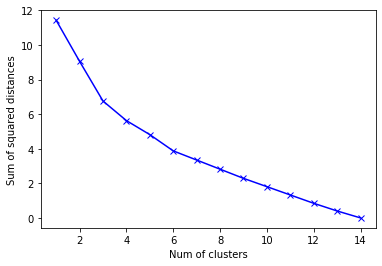

In [23]:
from matplotlib import pyplot as plt

plt.plot(Num_cluster, distances, 'bx-')
plt.xlabel('Num of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

The "elbow" point is at k=3. So we choose 3 clusters as optimal. 